In [2]:
#%matplotlib inline
import matplotlib
import seaborn as sns
sns.set(style="white")
matplotlib.rcParams['figure.dpi'] = 154

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [5]:
import folium

## Data

### Graffiti

In [6]:
bk_train_na = pd.read_csv('bk_train_na.csv')

In [198]:
bk_train_na.head()

Unnamed: 0   Latitude  Longitude            Created Date  \
0           0  40.696892 -73.974561  03/13/2017 10:24:50 AM   
1           2  40.633669 -74.000685  03/14/2017 08:51:04 AM   
2           3  40.702580 -73.945714  03/14/2017 03:50:57 PM   
3           5  40.630213 -74.004305  03/14/2017 08:52:50 AM   
4           9  40.700413 -73.912687  03/14/2017 07:28:38 PM   

              Closed Date  Incident Zip  Police Precincts Community Board  \
0  06/05/2017 12:00:00 AM       11205.0              55.0             02    
1  06/05/2017 12:00:00 AM       11219.0              39.0             12    
2  04/06/2017 12:00:00 AM       11206.0              56.0             01    
3  04/04/2017 12:00:00 AM       11219.0              41.0             10    
4  04/21/2017 12:00:00 AM       11237.0              53.0             04    

            Start Date           Close Date  Resolution Time (days)  YEAR  \
0  2017-03-13 10:24:50  2017-06-05 00:00:00                    83.0  2017   
1  2017-03-14 08:51:04  2017-06-05 00:00:00                    82.0  2017   
2  2017-03-14 15:50:57  2017-04-06 00:00:00                    22.0  2017   
3  2017-03-14 08:52:50  2017-04-04 00:00:00                    20.0  2017   
4  2017-03-14 19:28:38  2017-04-21 00:00:00                    37.0  2017   

   Count    Neighborhood  Center Lo  Center La  
0      1     Fort Greene -73.974883  40.690803  
1      1    Borough Park -73.988663  40.630958  
2      1         Bedford -73.949906  40.691516  
3      1   Dyker Heights -74.012095  40.622446  
4      1  Bushwick North -73.917767  40.700569

### Property

In [12]:
house = pd.read_csv("house_test.csv")

In [43]:
house.head()

Unnamed: 0   Latitude  Longitude  YEAR  FULLVAL  POSTCODE  LTFRONT  \
0           0  40.663386 -73.989269  2018        0   11215.0       50   
1           1  40.663016 -73.988141  2018        0   11215.0       18   
2           2  40.664534 -73.988941  2018        0   11215.0      144   
3           3  40.664105 -73.988055  2018        0   11215.0       22   
4           4  40.664075 -73.987997  2018        0   11215.0       22   

   LTDEPTH  BLDFRONT  BLDDEPTH                 NTA  Community Board  \
0      184        50       138  Park Slope-Gowanus            307.0   
1       80        15        80  Park Slope-Gowanus            307.0   
2      100         0         0  Park Slope-Gowanus            307.0   
3      100        22        55  Park Slope-Gowanus            307.0   
4      100        22        50  Park Slope-Gowanus            307.0   

   Council District TAXCLASS  
0              39.0        2  
1              39.0        2  
2              39.0        2  
3              39.0        2  
4              39.0        2

### Merge all data

In [14]:
graf_ct = bk_train_na[['YEAR', 'Neighborhood', 'Center Lo', 'Center La', 'Count']]

In [15]:
graf_ct = graf_ct.groupby(['YEAR', 'Neighborhood', 'Center Lo', 'Center La']).count()
graf_ct = graf_ct.reset_index()

In [16]:
graf_res = bk_train_na[['YEAR', 'Neighborhood', 'Center Lo', 'Center La', 'Resolution Time (days)']]

In [17]:
graf_res = graf_res.groupby(['YEAR', 'Neighborhood', 'Center Lo', 'Center La']).mean()
graf_res = graf_res.reset_index()

In [18]:
house_avg = house[['YEAR', 'NTA', 'FULLVAL']]

In [19]:
house_avg = house_avg.groupby(['YEAR', 'NTA']).mean()
house_avg = house_avg.reset_index()

In [41]:
graf = graf_ct.merge(graf_res, how='left', left_on=['YEAR', 'Neighborhood', 'Center Lo', 'Center La'], right_on=['YEAR', 'Neighborhood', 'Center Lo', 'Center La'])

In [42]:
graf = graf[graf['YEAR']!= 2019]

In [291]:
graf.head()

YEAR      Neighborhood  Center Lo  Center La  Count  \
49  2011        Bath Beach -74.007489  40.604278     15   
50  2011         Bay Ridge -74.029894  40.624844    104   
51  2011           Bedford -73.949906  40.691516    240   
52  2011  Bensonhurst East -73.983539  40.601437     74   
53  2011  Bensonhurst West -73.995261  40.612227    125   

    Resolution Time (days)  
49               38.000000  
50               43.048077  
51               44.916667  
52               30.135135  
53               51.824000

# Viz

## Shape File

In [23]:
nbhd = gpd.read_file('http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nynta/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')

In [24]:
BK = nbhd[nbhd['BoroName'] == 'Brooklyn']

In [39]:
BK.tail()

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
180       181         3  Brooklyn        047    BK09   
181       182         3  Brooklyn        047    BK38   
184       185         3  Brooklyn        047    BK45   
185       186         3  Brooklyn        047    BK99   
188       189         3  Brooklyn        047    BK76   

                                              NTAName   Shape__Area  \
180                      Brooklyn Heights-Cobble Hill  9.983686e+06   
181  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  2.847783e+07   
184    Georgetown-Marine Park-Bergen Beach-Mill Basin  6.942590e+07   
185                        park-cemetery-etc-Brooklyn  2.288384e+08   
188                                        Greenpoint  3.533352e+07   

     Shape__Length                                           geometry  
180   14264.763750  POLYGON ((-73.99236511308879 40.6896983765692,...  
181   32542.762288  POLYGON ((-73.9790591096592 40.7059611447014, ...  
184   92237.810224  POLYGON ((-73.91719656517211 40.6317464500611,...  
185  394677.333955  (POLYGON ((-73.9151347309828 40.5862776203429,...  
188   29047.532163  POLYGON ((-73.932135401113 40.7281678651539, -...

## Folium

In [326]:
m = folium.Map(location=[40.66, -73.95], zoom_start=11, 
               tiles ='cartodbpositron', width='85%', height='95%')

threshold_scale = np.linspace(0,
                              530,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist()

src = test[test['YEAR']==2011]

m.choropleth(geo_data=BK, data=src, columns=['Neighborhood', 'Count'], 
             key_on='feature.properties.NTAName',
             fill_color='BuPu', fill_opacity=0.5, line_opacity=0.5, 
             legend_name='Total Reports in 2011', 
             threshold_scale=threshold_scale
            )

for i in range(len(src)):
    lo = src.iloc[i]['Center Lo']
    la = src.iloc[i]['Center La']
    nam = src.iloc[i]['Neighborhood']
    tm = src.iloc[i]['Resolution Time (days)']
    ct = src.iloc[i]['Count']
    mkt = src.iloc[i]['New Market Value']
    inc = src.iloc[i]['Value Change Rate']
    folium.Marker([la, lo], 
                  popup='Neighborhood: {},\n Total Graffiti: {},\n Avg Response Time: {} days,\n Avg Market Value: $ {},\n Increased by {} %'.format(nam, ct, int(tm), round(mkt, 2), round(inc, 2)), 
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

m.save('folium_1.html')
m.save('folium_1.json')
m

## Make Heat Plots

In [30]:
# list of years (which are the column names at the moment)
list_of_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
# set the min and max range for the choropleth map
cmin, cmax = 0, 530
rmin, rmax = 0, 230
vmin, vmax = 365113, 21208414

In [21]:
import os

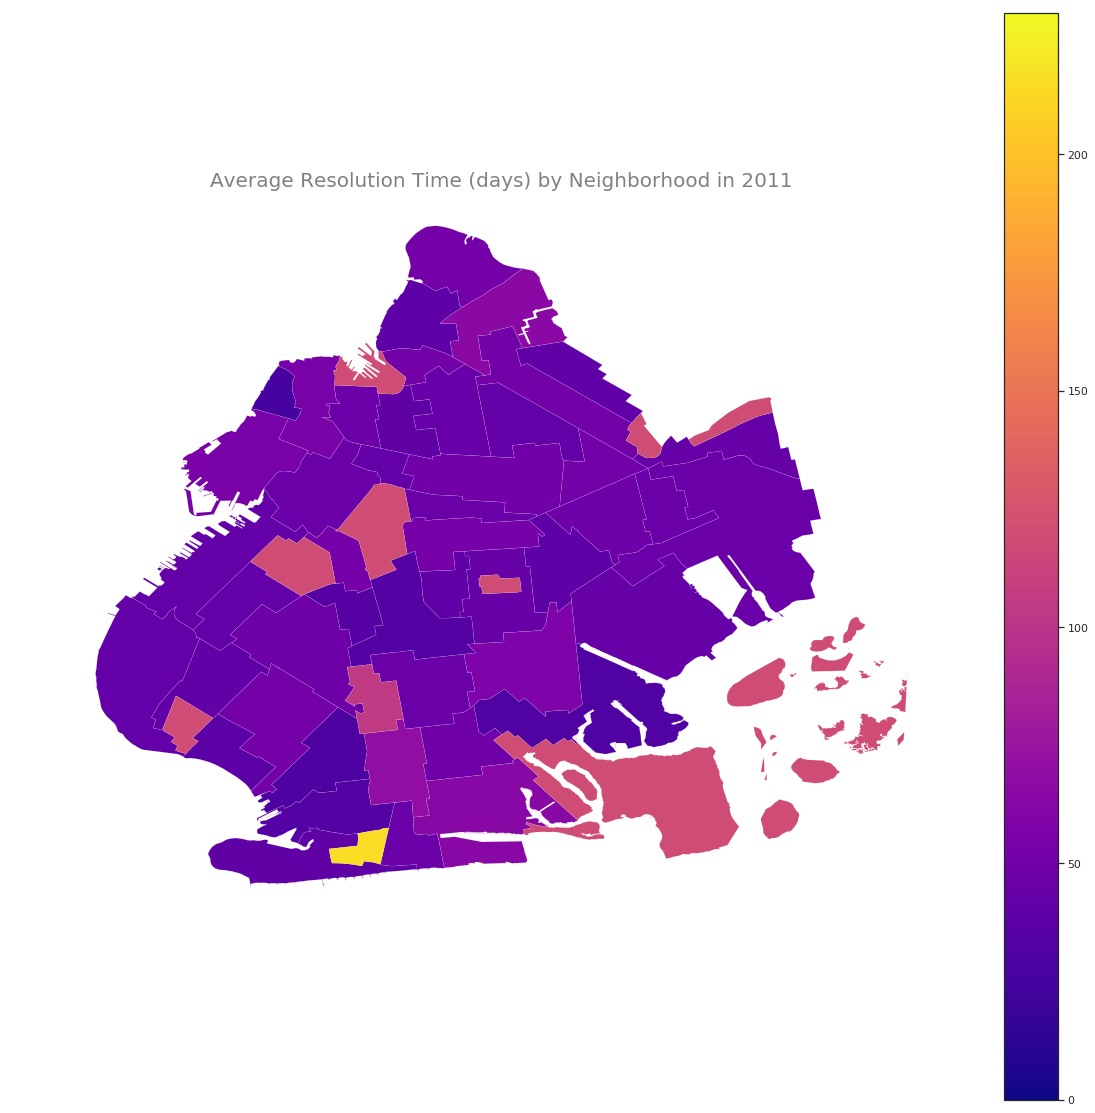

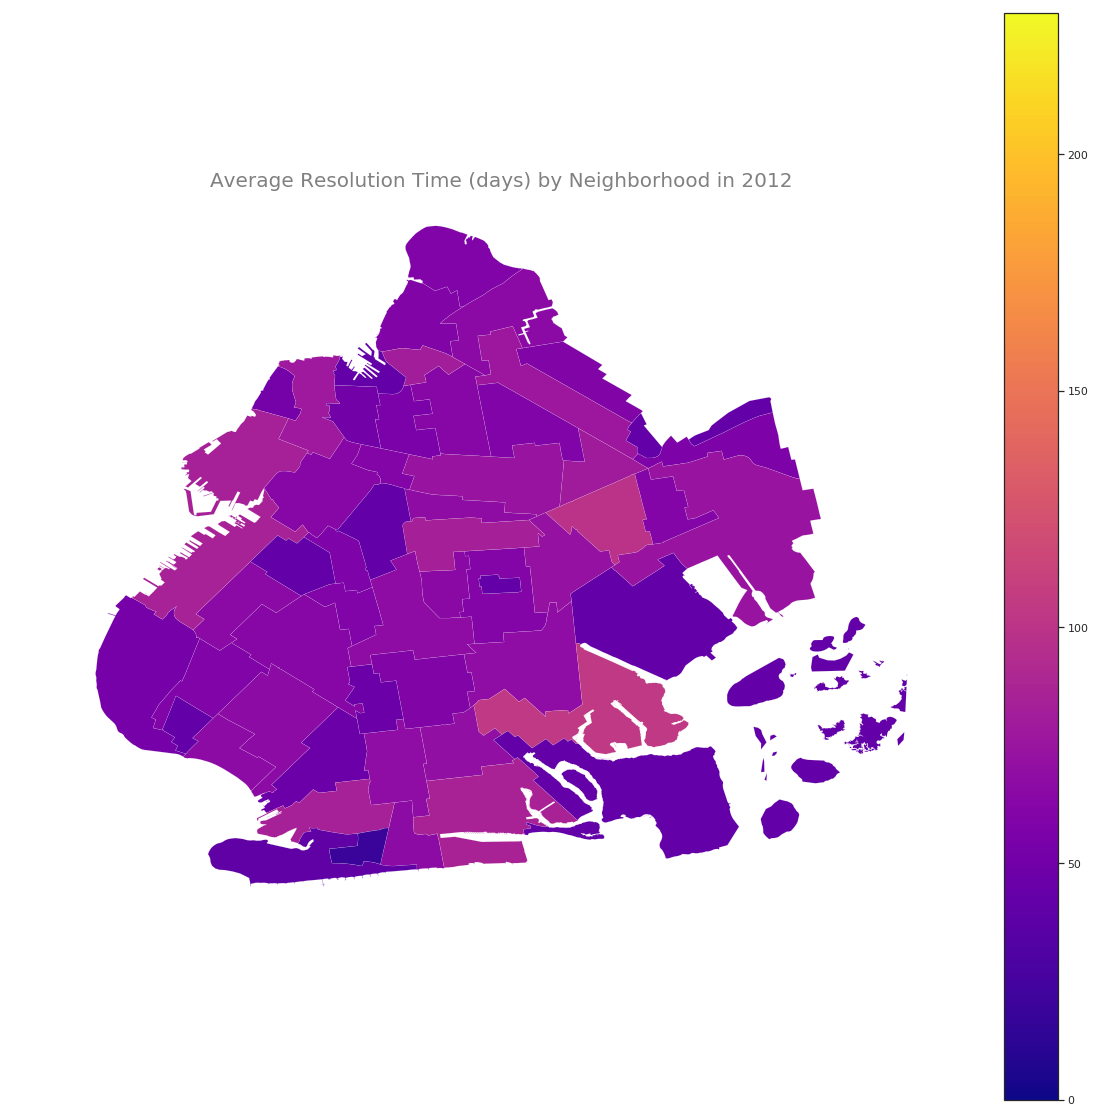

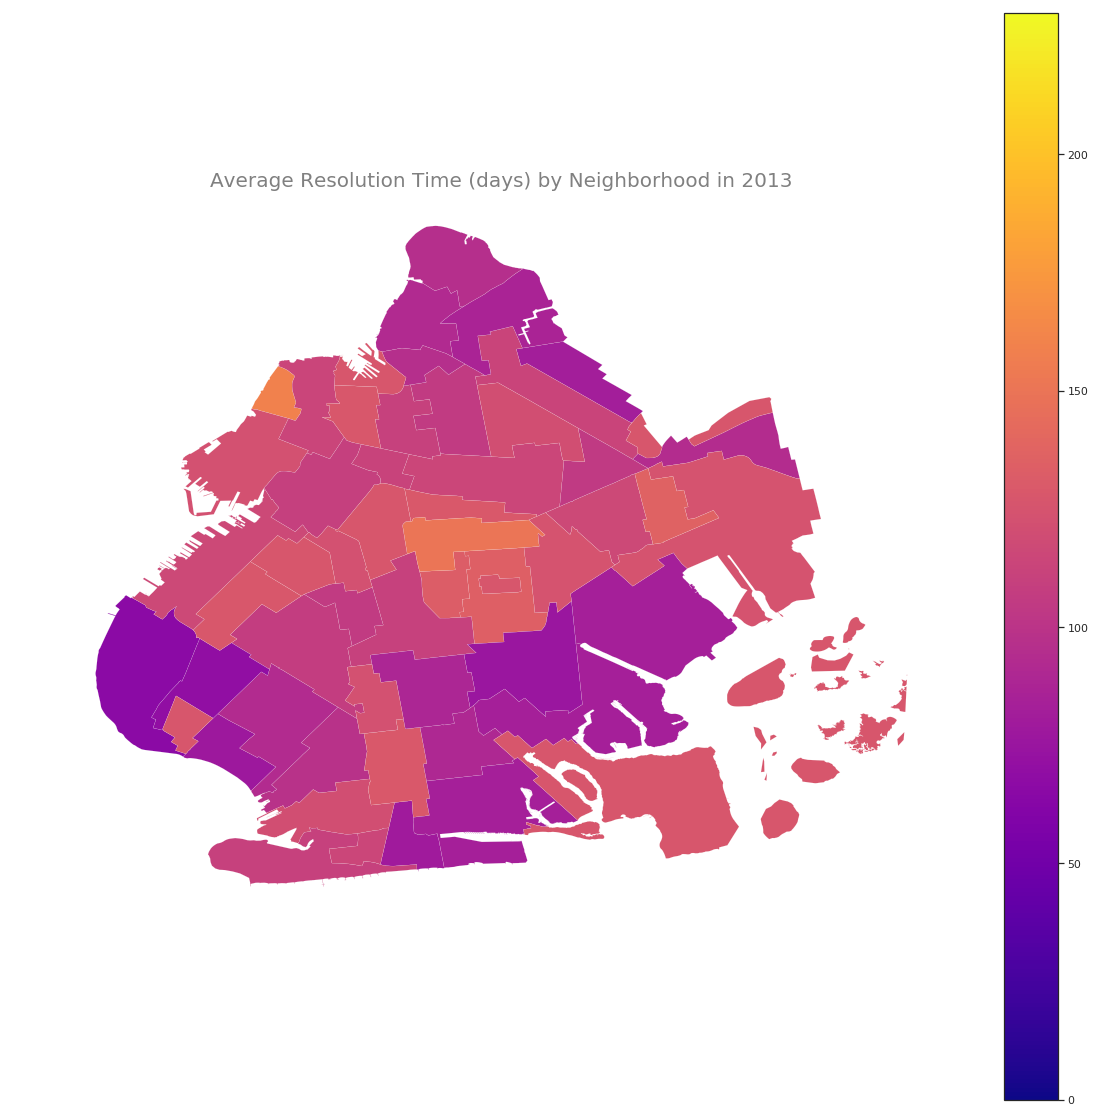

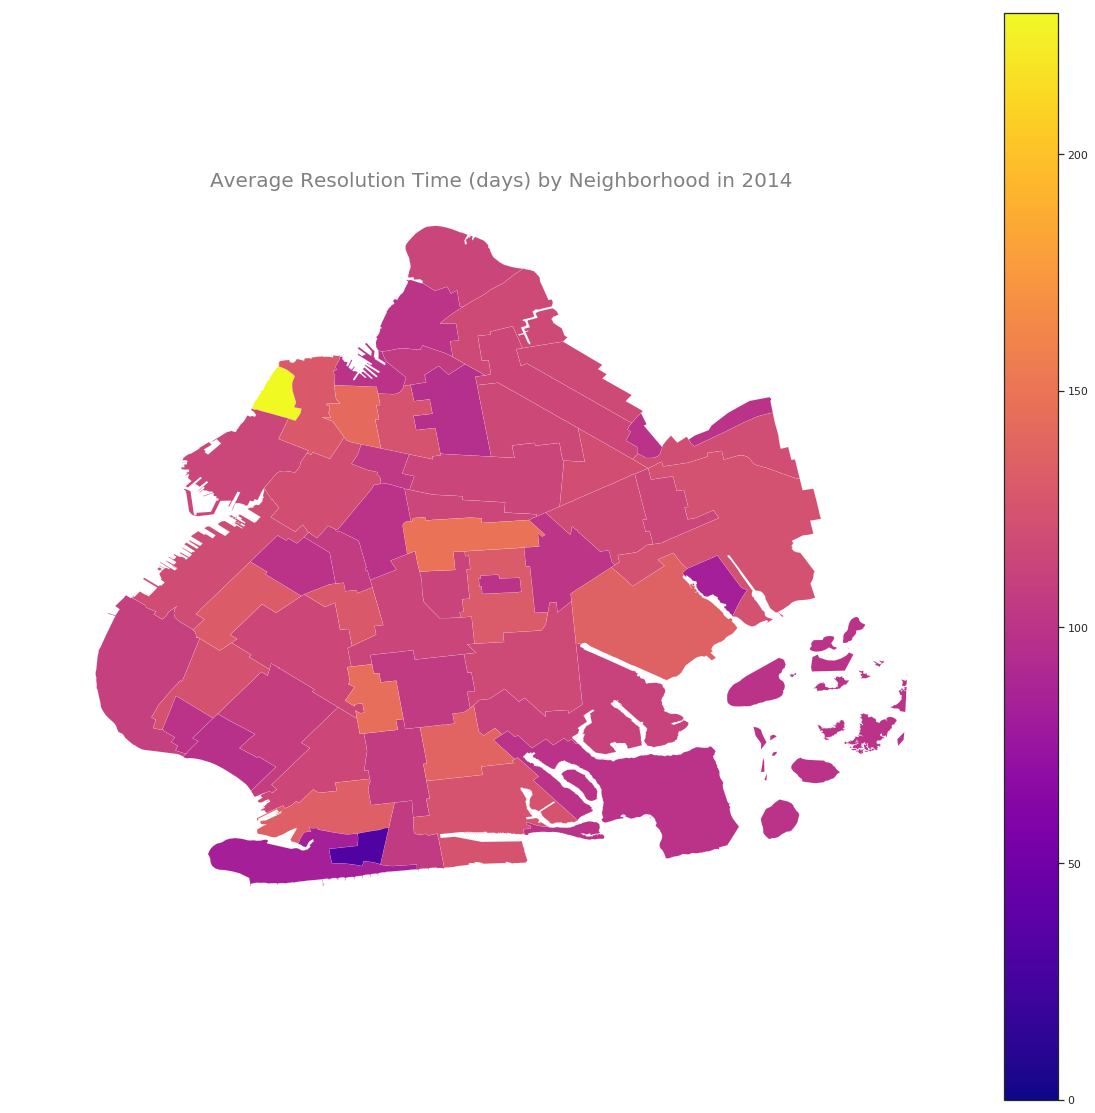

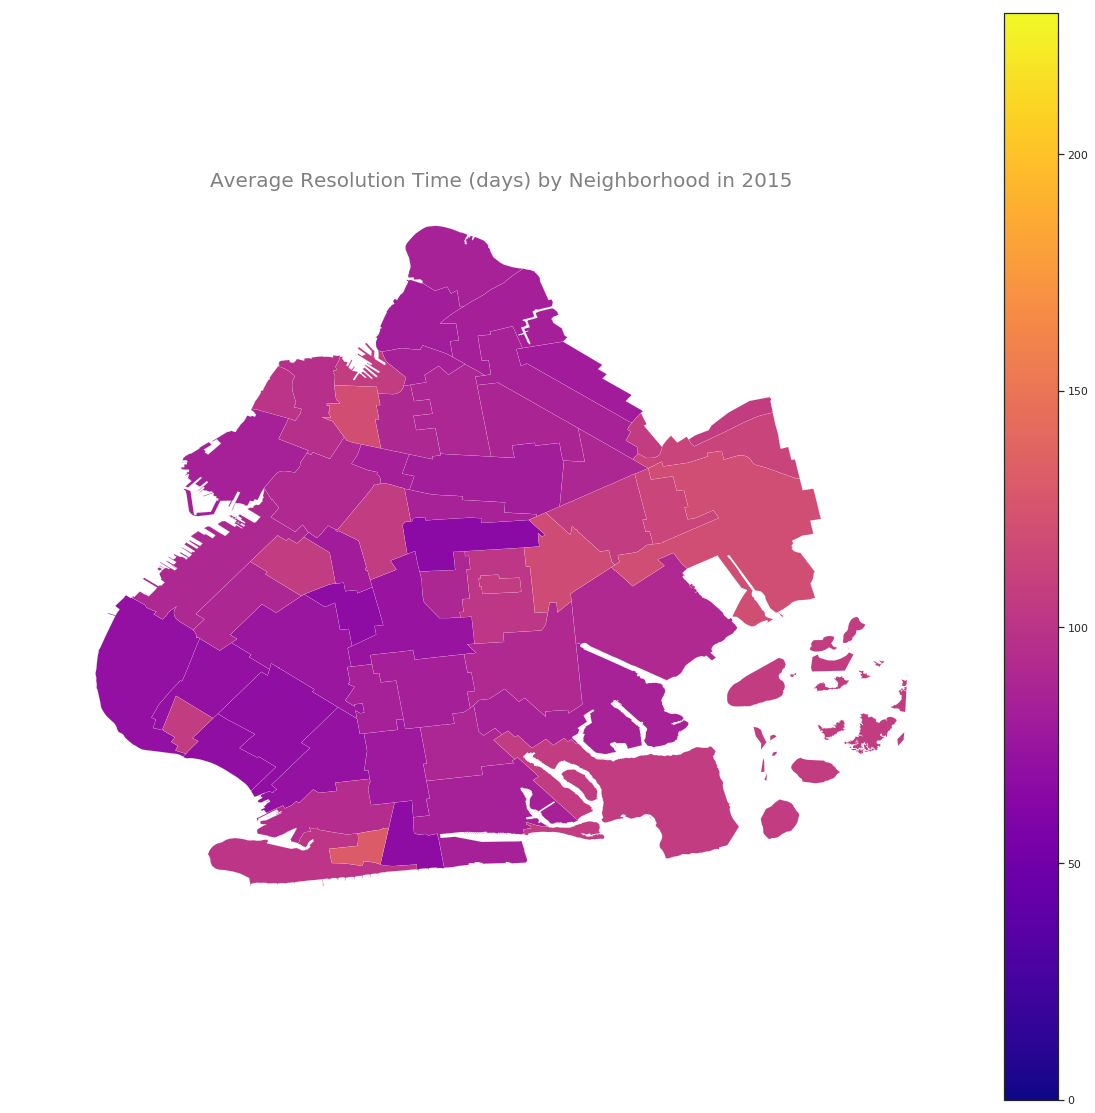

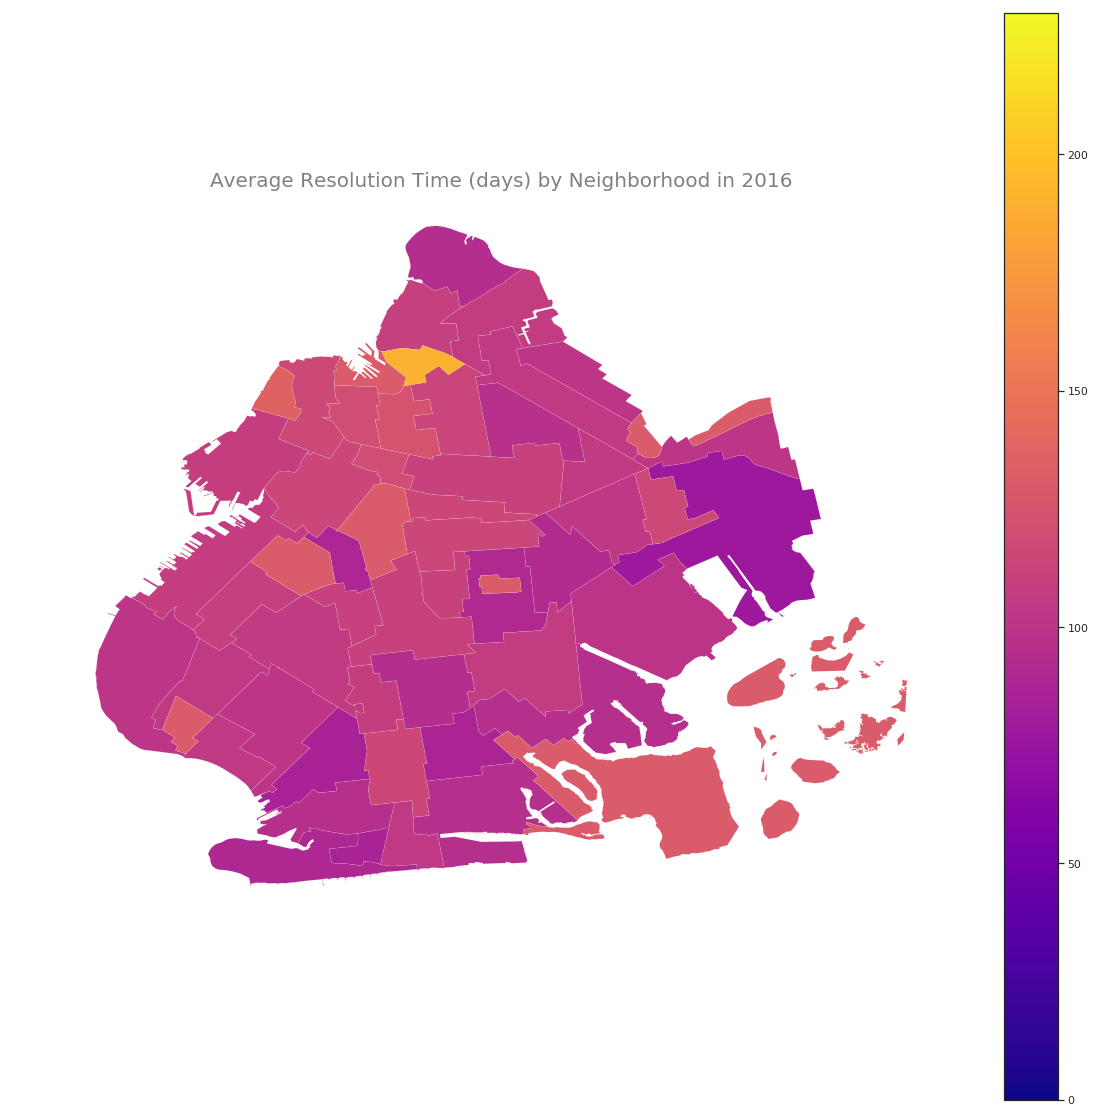

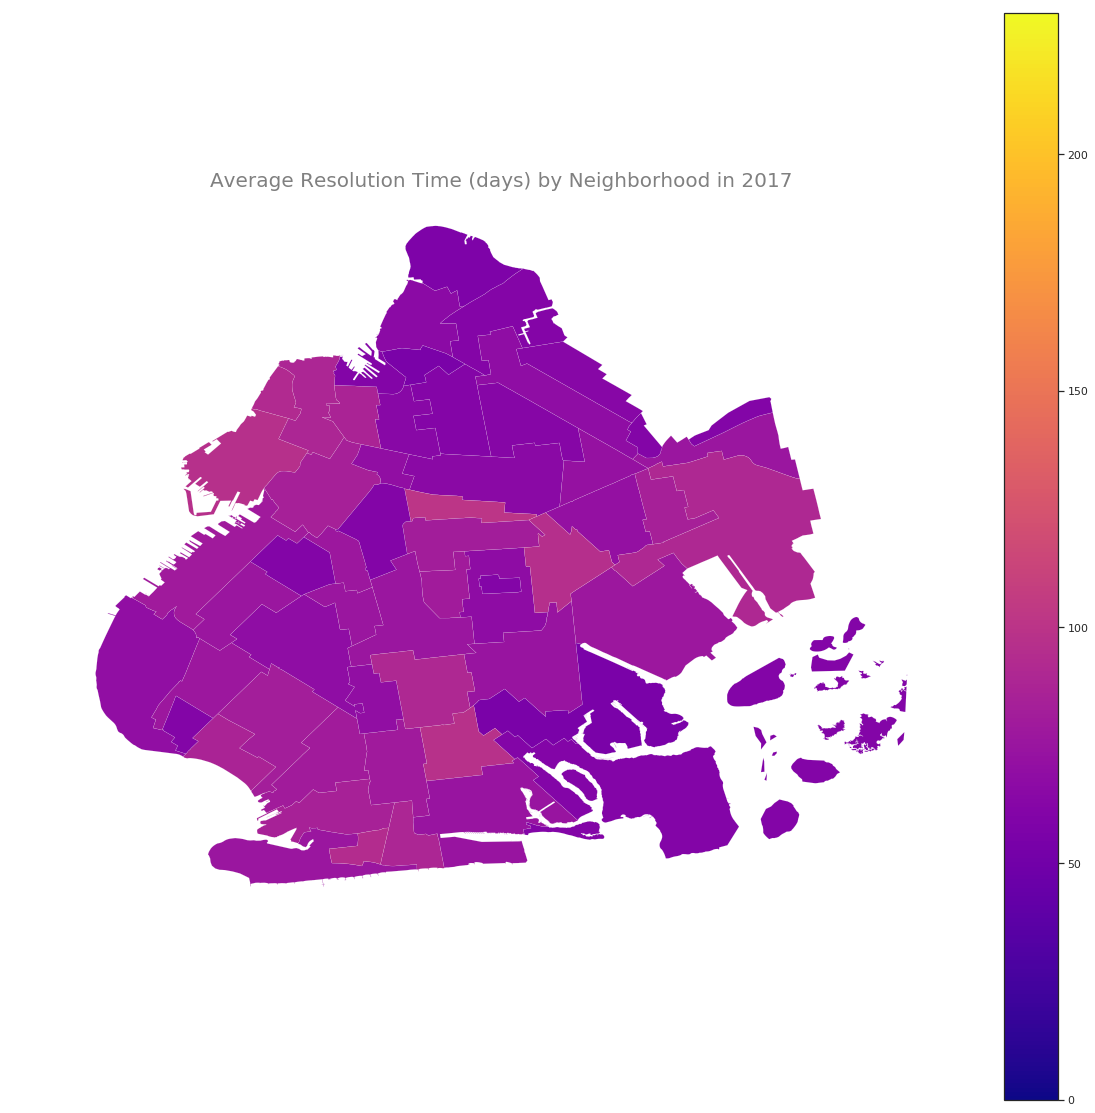

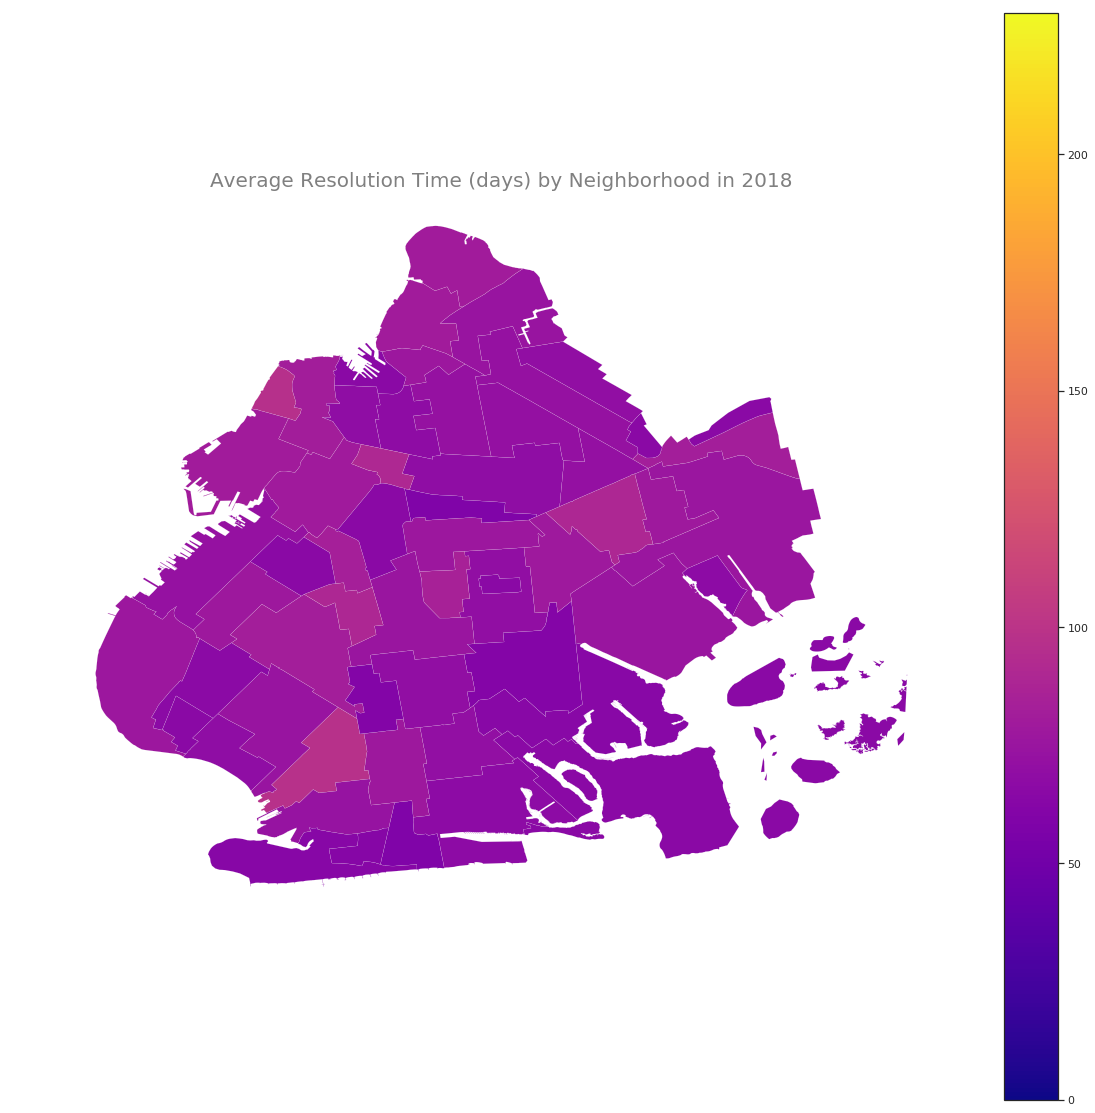

In [81]:
# start the for loop to create one map per year
for year in list_of_years:
    graf_df = gpd.GeoDataFrame(graf[graf['YEAR']==year].merge(BK, how='left', left_on='Neighborhood', right_on='NTAName'))
    
    fig, ax = plt.subplots(figsize = (20,20))

    c = graf_df.plot(column='Resolution Time (days)', cmap='plasma',alpha=1,linewidth=0.1, ax=ax, legend=True, 
                   vmin=rmin, vmax=rmax, norm=plt.Normalize(vmin=rmin, vmax=rmax))

    plt.title('Average Resolution Time (days) by Neighborhood in {}'.format(year), size=20, color='grey')
    plt.axis('off')
    plt.show()

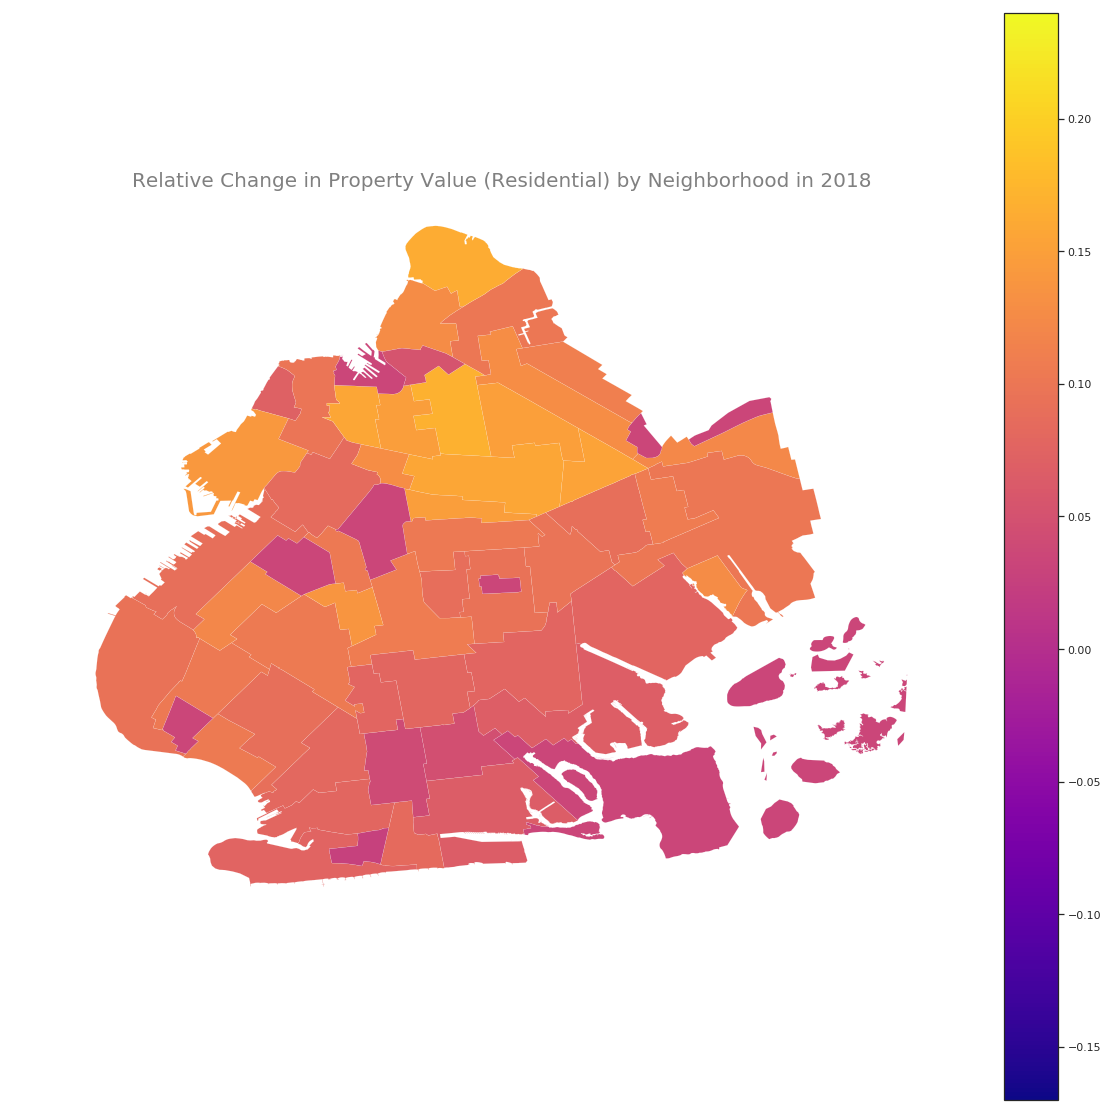

In [106]:
prop_df = gpd.GeoDataFrame(house_avg_2018.merge(BK, how='left', left_on='NTA', right_on='NTAName'))
    
fig, ax = plt.subplots(figsize = (20,20))

prop_df.plot(column='Value Change Rate', cmap='plasma',alpha=1,linewidth=0.1, ax=ax, legend=True, 
                   vmin=-.17, vmax=.24, norm=plt.Normalize(vmin=-.17, vmax=.24))

plt.title('Relative Change in Property Value (Residential) by Neighborhood in 2018', size=20, color='grey')
plt.axis('off')
plt.show()

# Compute change

In [159]:
graf = graf[graf['YEAR'] != 2010]

In [160]:
test = graf.merge(house_rate, how='left', left_on=['YEAR', 'Neighborhood'], right_on=['YEAR', 'Neighborhood'])

In [108]:
test = test.sort_values(by=['Count'])

In [162]:
test.head()

YEAR      Neighborhood  Center Lo  Center La  Count  \
0  2011        Bath Beach -74.007489  40.604278     15   
1  2011         Bay Ridge -74.029894  40.624844    104   
2  2011           Bedford -73.949906  40.691516    240   
3  2011  Bensonhurst East -73.983539  40.601437     74   
4  2011  Bensonhurst West -73.995261  40.612227    125   

   Resolution Time (days)  New Market Value  Old Market Value  \
0               38.000000     624700.221990     616931.215531   
1               43.048077     810009.046501     817854.860092   
2               44.916667     441941.250112     480476.837844   
3               30.135135     556090.505116     583175.265057   
4               51.824000     658005.077256     668619.580564   

   Value Change Rate  
0           0.012593  
1          -0.009593  
2          -0.080203  
3          -0.046444  
4          -0.015875

In [110]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

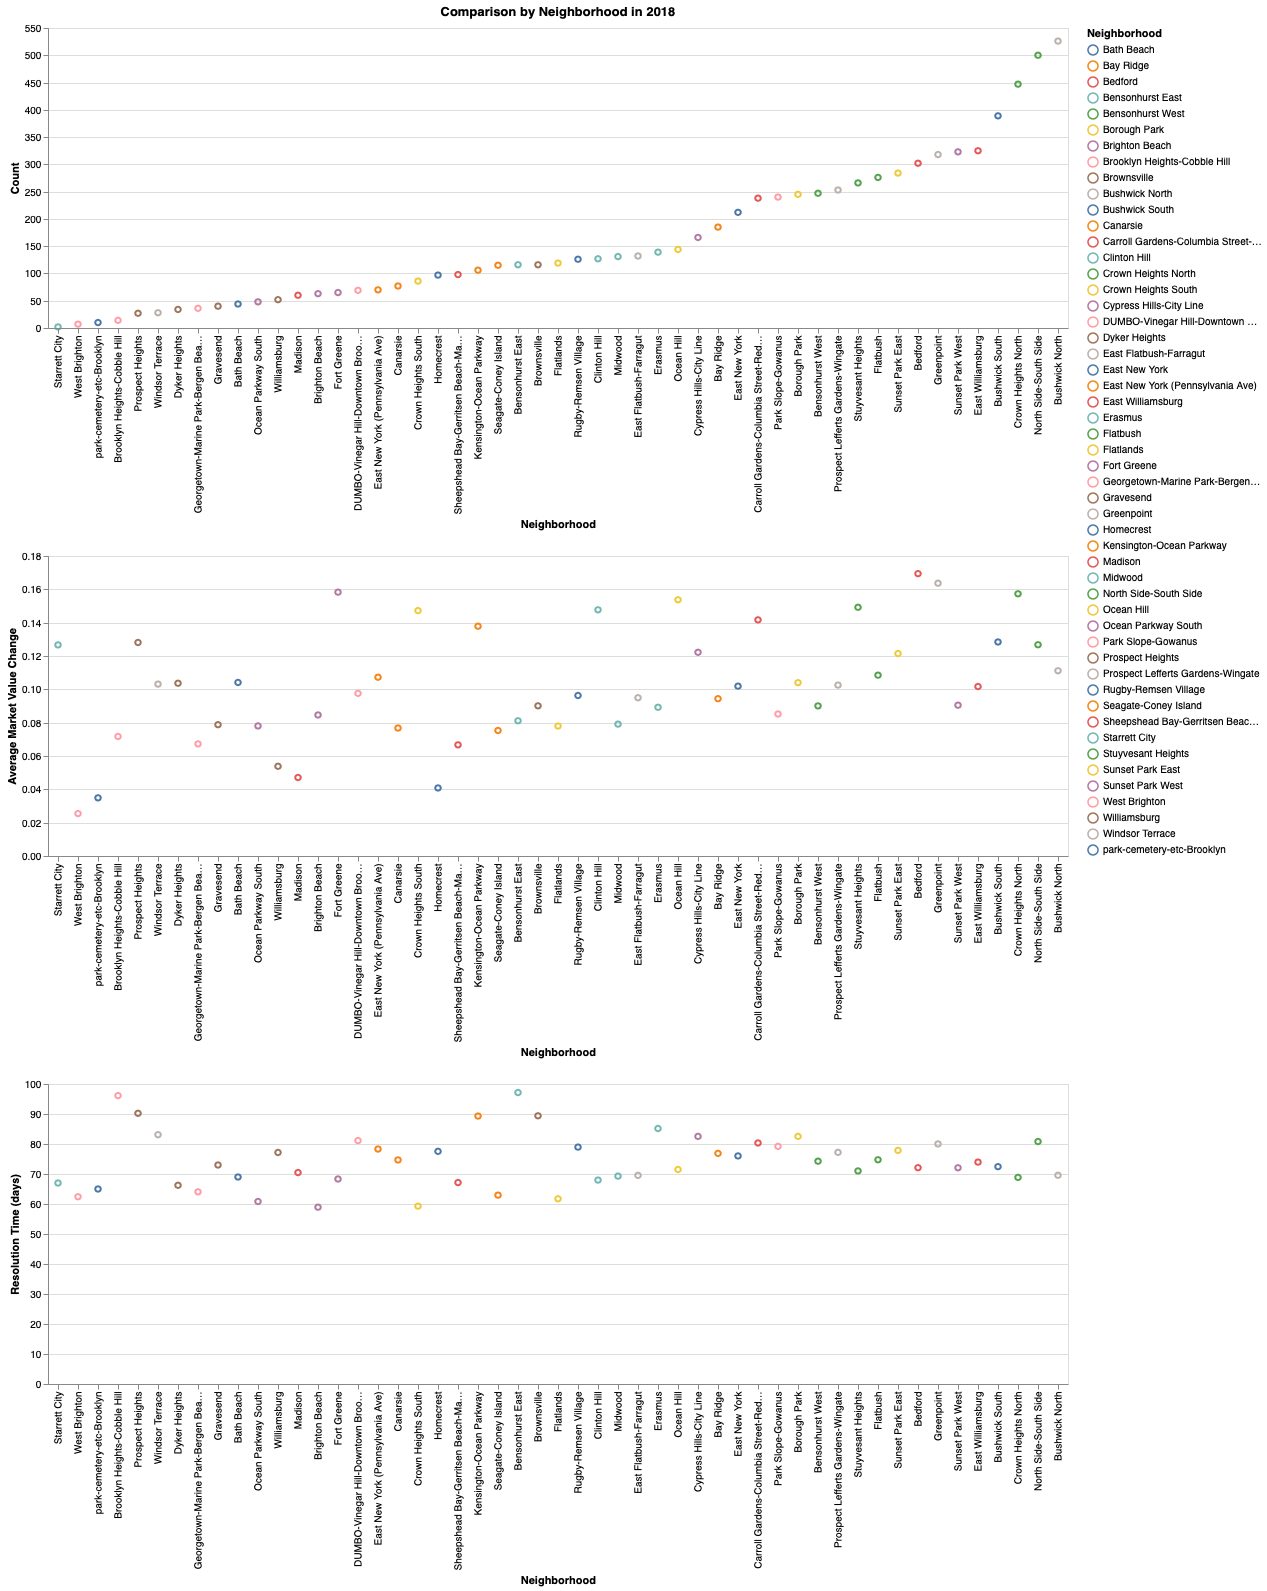

In [120]:
brush = alt.selection_interval(encodings=['x'])

ct_chart = alt.Chart(test, title="Comparison by Neighborhood in 2018").mark_point().encode(
    alt.X('Neighborhood:N',             
            sort=alt.EncodingSortField(
            field="Count",  # The field to use for the sort
            order="ascending"  # The order to sort in
        )),
    alt.Y('Count:Q'),
    color=alt.condition(brush, 'Neighborhood:N', alt.value('lightgray')),
    opacity = alt.condition(brush, alt.value(1), alt.value(0.1)), 
    tooltip = ['Neighborhood', 'Count']
).add_selection(
    brush           
)

res_chart = alt.Chart(test).mark_point().encode(
    alt.X('Neighborhood:N', 
            sort=alt.EncodingSortField(
            field="Count",  # The field to use for the sort
            order="ascending"  # The order to sort in
        )),
    alt.Y('Resolution Time (days):Q'),
    color=alt.condition(brush, 'Neighborhood:N', alt.value('lightgray')),
    opacity = alt.condition(brush, alt.value(1), alt.value(0.1)), 
    tooltip = ['Neighborhood', 'Count', 'Resolution Time (days)']
).add_selection(
    brush           
)


house_chart = alt.Chart(test).mark_point().encode(
    alt.X("NTA:N", title='Neighborhood',
            sort=alt.EncodingSortField(
            field="Count",  # The field to use for the sort
            order="ascending"  # The order to sort in
        )),
    alt.Y("Value Change Rate:Q", title='Average Market Value Change'),
    color=alt.condition(brush, "Neighborhood:N", alt.value("lightgray")),
    opacity = alt.condition(brush, alt.value(1), alt.value(0.1)), 
    tooltip = ['Neighborhood', alt.Tooltip('Value Change Rate', title='Average Market Value Change')]
).add_selection(brush)



charts = ct_chart &  house_chart & res_chart
charts.save('charts_2018.json')
charts.save('charts_2018.html')
charts

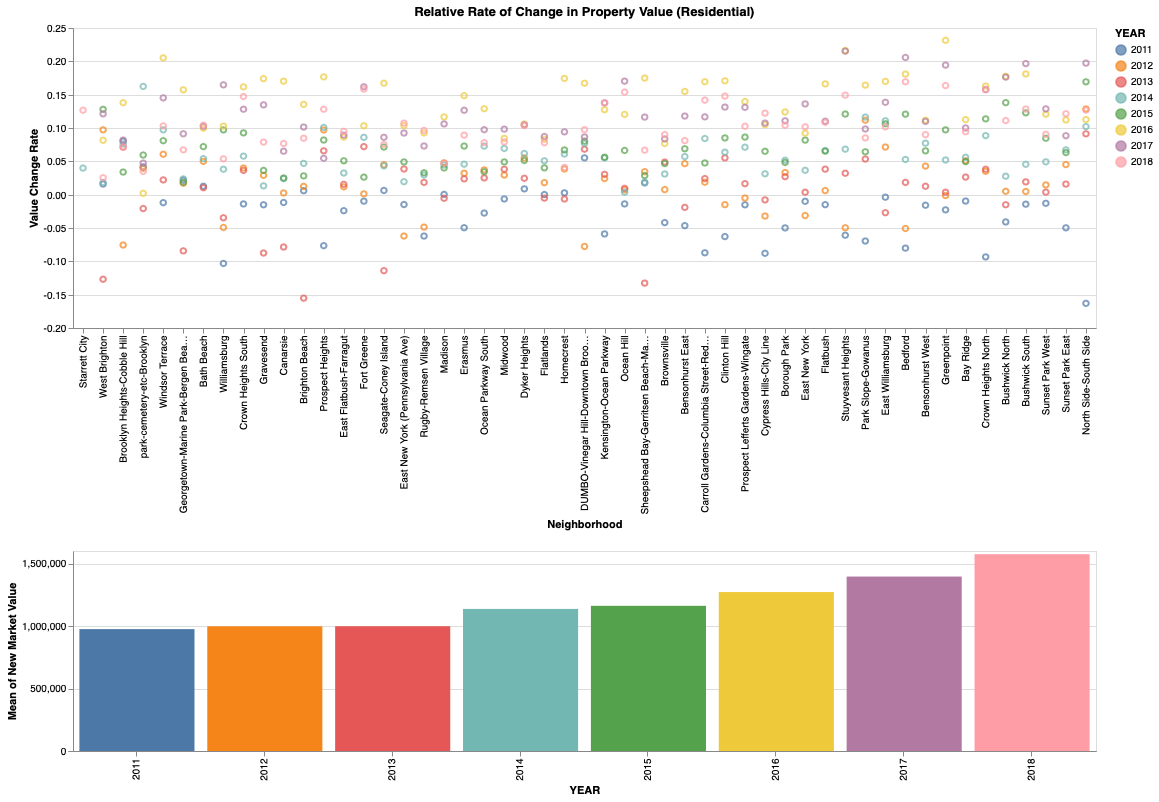

In [197]:
size_selector = alt.selection_multi(encodings=['x'])

scatter = alt.Chart(test, title="Relative Rate of Change in Property Value (Residential)", width=1023).mark_point().encode(
    alt.X("Neighborhood:N",            sort=alt.EncodingSortField(
            field="Count",  # The field to use for the sort
            order="ascending"  # The order to sort in
        )),
    y="Value Change Rate:Q",
    color = alt.condition( size_selector , "YEAR:N", alt.value("white"))
)

#we input certain strings as functions
size_hist = alt.Chart(test, width=1023, height=200).mark_bar().encode(
    x = "YEAR:N",
    y = "mean(New Market Value):Q",
    color = alt.condition(size_selector, 'YEAR:N', alt.value("lightgray"))
).add_selection(size_selector) #this binds the selector to the plot

scatter & size_hist 
test_chart = scatter & size_hist
test_chart.save('prop_chart.json')
test_chart.save('prop_chart.html')
test_chart

# Time Series

In [264]:
bk_train_na['Date'] = pd.DatetimeIndex(bk_train_na['Created Date']).strftime('%Y-%m')

In [275]:
NTA = list(set(test['Neighborhood']))

In [285]:
NTA

['Bath Beach',
 'Bushwick North',
 'Stuyvesant Heights',
 'Dyker Heights',
 'Borough Park',
 'Brooklyn Heights-Cobble Hill',
 'Fort Greene',
 'Starrett City',
 'Brighton Beach',
 'Windsor Terrace',
 'Crown Heights South',
 'Rugby-Remsen Village',
 'East Williamsburg',
 'Carroll Gardens-Columbia Street-Red Hook',
 'Prospect Lefferts Gardens-Wingate',
 'Seagate-Coney Island',
 'Clinton Hill',
 'Kensington-Ocean Parkway',
 'Georgetown-Marine Park-Bergen Beach-Mill Basin',
 'Park Slope-Gowanus',
 'West Brighton',
 'North Side-South Side',
 'Sunset Park West',
 'Madison',
 'Bedford',
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill',
 'Flatbush',
 'Ocean Hill',
 'Gravesend',
 'Homecrest',
 'Crown Heights North',
 'Canarsie',
 'Bensonhurst West',
 'Midwood',
 'Greenpoint',
 'Cypress Hills-City Line',
 'Bushwick South',
 'Sheepshead Bay-Gerritsen Beach-Manhattan Beach',
 'Erasmus',
 'Sunset Park East',
 'East New York',
 'Bensonhurst East',
 'East Flatbush-Farragut',
 'Flatlands',
 'William

In [278]:
nb_gp_1 = bk_train_na[['Date', 'Neighborhood', 'Count']]
nb_gp_2 = bk_train_na[['Date', 'Neighborhood', 'Resolution Time (days)']]

In [279]:
nb_gp_1 = nb_gp_1.groupby(['Date', 'Neighborhood']).sum()
nb_gp_2 = nb_gp_2.groupby(['Date', 'Neighborhood']).mean()

In [280]:
nb_gp = nb_gp_1.merge(nb_gp_2, how='left', left_on=['Date', 'Neighborhood'], right_on=['Date', 'Neighborhood'])

In [281]:
nb_gp=nb_gp.reset_index()

In [283]:
nb_gp_count = nb_gp[['Date', 'Neighborhood', 'Count']]

In [284]:
nb_gp_res = nb_gp[['Date', 'Neighborhood', 'Resolution Time (days)']]

In [ ]:
nb_gp = nb_gp.melt(id_vars=['Date'], value_vars=['Count', 'Resolution Time (days)'])

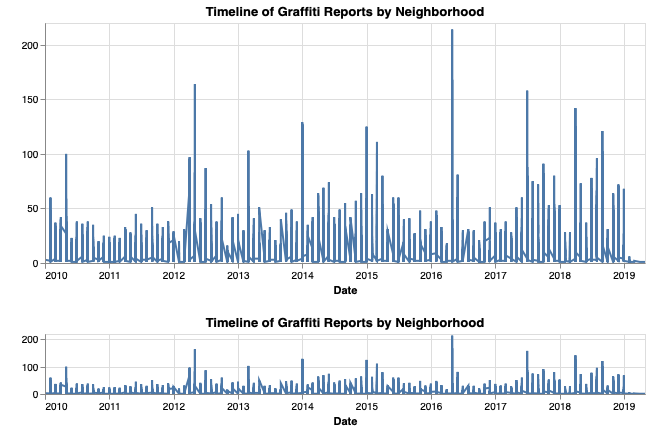

In [290]:
# Define a new selection object.
brush = alt.selection(type='interval', encodings=['x'], clear=False)


#specified dimensions below, remove here
base = alt.Chart(nb_gp_count, title="Timeline of Graffiti Reports by Neighborhood").mark_line().encode(
    alt.X('Date:T', scale=alt.Scale(domain=brush)),
    alt.Y('Count', title=" ")
)

columns=NTA

# A dropdown filter
column_dropdown = alt.binding_select(options=columns)
column_select = alt.selection_single(
    fields=['Neighborhood'],
    on='doubleclick',
    clear=False, 
    bind=column_dropdown, 
    name="y_value",
    init={'variable': "Bath Beach"}
)


#Specify the top chart as a modification of the base chart
filter_columns = base.add_selection(
    column_select
).transform_filter(
    column_select
).properties(
    height=240,
    width = 600
)


#Specify the lower chart as a modification of the base chart
lower = filter_columns.add_selection(
    column_select
).transform_filter(
    column_select
).properties(
    height=60,
    width = 600
).add_selection(brush)



nb_count_chart = filter_columns & lower
nb_count_chart.save('nb_count.json')
nb_count_chart.save('nb_count.html')
nb_count_chart